In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [2]:
#donwload lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/tEenLK693lU9v01')

# Exercise 1

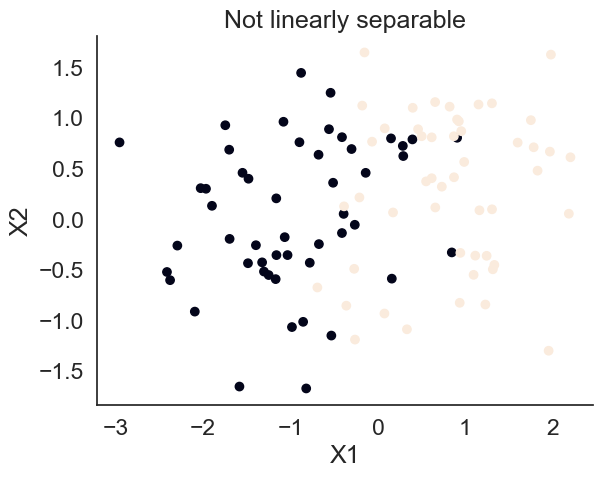

In [26]:
X_nsep,y_nsep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)
plt.scatter(X_nsep[:,0],X_nsep[:,1],c=y_nsep)
plt.title('Not linearly separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [33]:
X,y = X_nsep,y_nsep
K = np.outer(np.logspace(-4,1,6),np.arange(1,10,1)).flatten()
n_splits = 2
avg_performances = []
kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
for i in range(len(K)):
    avg_performance = []
    fold_performance = []
    clf = svm.LinearSVC(C=K[i],max_iter=1000)
    clf.fit(X_train, y_train)
    fold_performance.append(clf.score(X_test,y_test))
    avg_performance.append(np.mean(fold_performance))
    avg_performances.append(np.asarray(avg_performance))

Text(0.5, 1.0, 'Lin seperation with K=0.2')

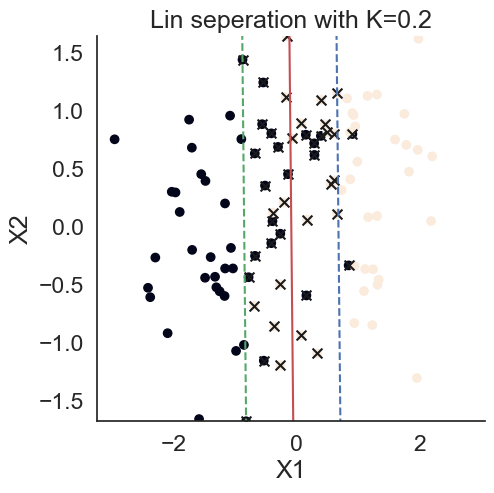

In [34]:
#For the best value of K, the average performance value has to be maximum.
#If there are mutliple values for K for which this is true, the best value is the highest. 
idxmaxvalues=[]
for i in range(len(K)):
    if np.max(avg_performances) == avg_performances[i]:
        idxmaxvalues.append(i)
optKvalue =  K[np.max(idxmaxvalues)]

# make a plot funtion in utilities?
plt.figure(figsize=(5,5))
X,y = X_nsep,y_nsep
svc_model = svm.SVC(kernel='linear',C=optKvalue);
svc_model.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y_nsep)
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-2,2)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1], 
            s=50, 
            c='k',
            marker='x');
# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--')
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--')

plt.ylim([min(X[:,1]),max(X[:,1])])

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Lin seperation with K={0}'.format(optKvalue))

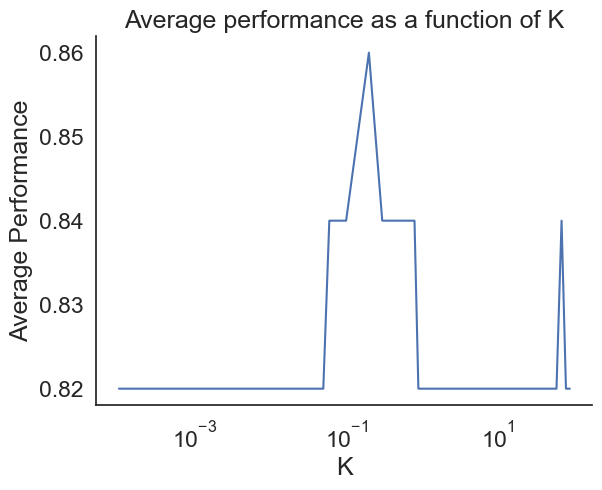

In [35]:
plt.plot(K, avg_performances)
plt.title('Average performance as a function of K')
plt.xlabel('K')
plt.ylabel('Average Performance')
plt.xscale('log')